In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/data/diamond_csv")
df.head()


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
df['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
ord = OrdinalEncoder(categories=[["Premium","Ideal","Very Good","Good","Fair"]])
ord.fit(df[['cut']])
df['cut'] = ord.transform(df[['cut']])

In [ ]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,1.0,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,0.0,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,3.0,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,0.0,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,3.0,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
df['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df['color'] = lb.fit_transform(df[['color']])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
df.clarity.unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

<ipython-input-234-89f87e74dbb4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cr_mat = df.corr('spearman')


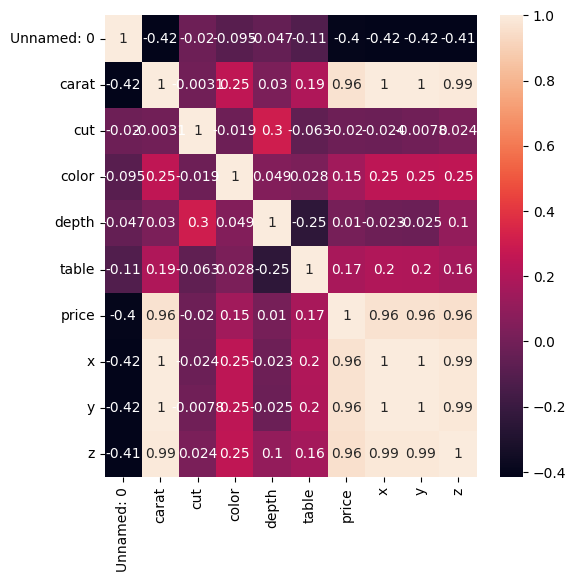

In [ ]:
cr_mat = df.corr('spearman')
plt.figure(figsize=(6,6))
sns.heatmap(cr_mat,annot=True)
plt.show()

In [ ]:
k=["IF","VVS1","VVS2","VS1","VS2","SI1","SI2","I1"]
ordd = OrdinalEncoder(categories = [k])
df['clarity'] = ordd.fit_transform(df[['clarity']])
df.head()


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,1.0,1,6.0,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,0.0,1,5.0,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,3.0,1,3.0,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,0.0,5,4.0,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,3.0,6,6.0,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
df.drop('Unnamed: 0',axis=1,inplace=True)


In [ ]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,1.0,1,6.0,61.5,55.0,326,3.95,3.98,2.43
1,0.21,0.0,1,5.0,59.8,61.0,326,3.89,3.84,2.31
2,0.23,3.0,1,3.0,56.9,65.0,327,4.05,4.07,2.31
3,0.29,0.0,5,4.0,62.4,58.0,334,4.20,4.23,2.63
4,0.31,3.0,6,6.0,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
#variance threshold method
from sklearn.feature_selection import VarianceThreshold
var = VarianceThreshold(2)
var.fit(df)
var.get_support()

array([False, False,  True,  True,  True,  True,  True, False, False,
       False])

In [ ]:
df1 = sns.load_dataset('iris')
df1.head()
x=df1.iloc[:,:4]
y=df1['species']



In [ ]:
#using chi square
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
chi2_selector = SelectKBest(chi2,k=2)
kbest = chi2_selector.fit_transform(x,y)
x=pd.DataFrame(x)
chi2_scores =pd.DataFrame(list(zip(x.columns,chi2_selector.scores_)),columns=["feature","scores"])
chi2_scores


,feature,scores
0,sepal_length,10.817821
1,sepal_width,3.710728
2,petal_length,116.312613
3,petal_width,67.048360


In [ ]:
chi2_scores.sort_values(ascending =False,by='scores')

,feature,scores
2,petal_length,116.312613
3,petal_width,67.048360
0,sepal_length,10.817821
1,sepal_width,3.710728


In [ ]:
#using Annova f value
#using chi square and Annova
from sklearn.feature_selection import SelectKBest
#percentile means instead of giving k value if we give 0.2 that means select top 20% features
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
f_selector = SelectKBest(f_classif,k=2)
kbest = f_selector.fit_transform(x,y)
x=pd.DataFrame(x)
f_scores =pd.DataFrame(list(zip(x.columns,f_selector.scores_)),columns=["feature","scores"])
f_scores

,feature,scores
0,sepal_length,119.264502
1,sepal_width,49.160040
2,petal_length,1180.161182
3,petal_width,960.007147


In [ ]:
f_scores.sort_values(ascending =False,by='scores')

,feature,scores
2,petal_length,1180.161182
3,petal_width,960.007147
0,sepal_length,119.264502
1,sepal_width,49.160040


In [ ]:
from sklearn.feature_selection import SelectKBest
#percentile means instead of giving k value if we give 0.2 that means select top 20% features
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
fp_selector = SelectPercentile(f_classif,percentile=25)
k2best = fp_selector.fit_transform(x,y)
x=pd.DataFrame(x)
fp_scores =pd.DataFrame(list(zip(x.columns,fp_selector.scores_)),columns=["feature","scores"])
k2best.shape[1]

1

In [ ]:
#using decision trees
#for classification use mutual_info_classif
#for regression use mutual_class_regression
from sklearn.feature_selection import mutual_info_classif
feature_scores = mutual_info_classif(x,y,random_state = 0)
pd.DataFrame(list(zip(x.columns,feature_scores)),columns=['features','scores'])

,features,scores
0,sepal_length,0.473873
1,sepal_width,0.286072
2,petal_length,0.989585
3,petal_width,0.974938


In [ ]:
list(zip(x.columns,feature_scores))

[('sepal_length', 0.4738732342805525),
 ('sepal_width', 0.28607227699171767),
 ('petal_length', 0.9895851732491787),
 ('petal_width', 0.9749379656705233)]

In [ ]:
x.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [ ]:
feature_scores

array([0.47387323, 0.28607228, 0.98958517, 0.97493797])

wrapper and embedded techniques

In [ ]:
!pip install --upgrade pip



In [ ]:
!pip install mlxtend

In [ ]:
#forward selection
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4)
sf = sfs(knn,k_features=3,forward=True,floating=False,scoring="accuracy",cv=2,n_jobs=-1)
sf.fit(x,y)

SequentialFeatureSelector(cv=2, estimator=KNeighborsClassifier(n_neighbors=4),
                          k_features=(3, 3), n_jobs=-1, scoring='accuracy')

In [ ]:
pd.DataFrame.from_dict(sf.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(3,)","[0.96, 0.96]",0.96,"(petal_width,)",0.0,0.0,0.0
2,"(2, 3)","[0.96, 0.96]",0.96,"(petal_length, petal_width)",0.0,0.0,0.0
3,"(1, 2, 3)","[0.9733333333333334, 0.9466666666666667]",0.96,"(sepal_width, petal_length, petal_width)",0.057369,0.013333,0.013333


In [ ]:
#backward elimination
sf2 = sfs(knn,k_features=3,forward=False,floating=False,scoring="accuracy",cv=2,n_jobs=-1)
sf2.fit(x,y)
pd.DataFrame(sf2.get_metric_dict()).T


,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
4,"(0, 1, 2, 3)","[0.96, 0.9466666666666667]",0.953333,"(sepal_length, sepal_width, petal_length, peta...",0.028684,0.006667,0.006667
3,"(1, 2, 3)","[0.9733333333333334, 0.9466666666666667]",0.96,"(sepal_width, petal_length, petal_width)",0.057369,0.013333,0.013333


In [ ]:
sf3 = sfs(knn,k_features=3,forward=True,floating=True,scoring="accuracy",cv=2,n_jobs=-1)
sf3.fit(x,y)
pd.DataFrame(sf3.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(3,)","[0.96, 0.96]",0.96,"(petal_width,)",0.0,0.0,0.0
2,"(2, 3)","[0.96, 0.96]",0.96,"(petal_length, petal_width)",0.0,0.0,0.0
3,"(1, 2, 3)","[0.9733333333333334, 0.9466666666666667]",0.96,"(sepal_width, petal_length, petal_width)",0.057369,0.013333,0.013333


In [ ]:
yy = df['price']
xx = df.drop("price",axis =1)

In [ ]:
print(yy)

0         326
1         326
2         327
3         334
4         335
         ... 
53935    2757
53936    2757
53937    2757
53938    2757
53939    2757
Name: price, Length: 53940, dtype: int64


In [ ]:
#recurrsive feature elimination
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr_m = RFE(lr)
lr_m.fit(xx,yy)

RFE(estimator=LinearRegression())

In [ ]:
lr_m.support_

array([ True, False,  True,  True, False, False,  True, False, False])

In [ ]:
lr_m1 = RFECV(lr,cv=5)
lr_m1.fit(xx,yy)
lr_m1.support_
lr_m1.n_features_

2

embedded techniques

In [ ]:
#using lasso we can find good features
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
import numpy as np
xx_train,xx_test,yy_train,yy_test=train_test_split(xx,yy,test_size=0.20,random_state=42)
lasso = Lasso(alpha=1)
lasso.fit(xx_train,yy_train)
y_pred1 = lasso.predict(xx_test)
mean_square_error = np.mean((y_pred1-yy_test)**2)
print(mean_square_error)
print(lasso.coef_)




1499229.545728127
[ 1.06308149e+04 -1.12631940e+02 -3.23568360e+02 -5.08200943e+02
 -8.52751858e+01 -5.04952556e+01 -8.09572393e+02  7.84629178e+00
 -0.00000000e+00]


In [ ]:
#using random forest to select features
from sklearn.ensemble import RandomForestRegressor
rr = RandomForestRegressor(n_estimators = 100,random_state=42)
rr.fit(xx,yy)
rr.feature_importances_



array([0.63302017, 0.00132524, 0.03170406, 0.06299832, 0.0032346 ,
       0.00254465, 0.00459788, 0.25550208, 0.005073  ])

<function matplotlib.pyplot.show(close=None, block=None)>

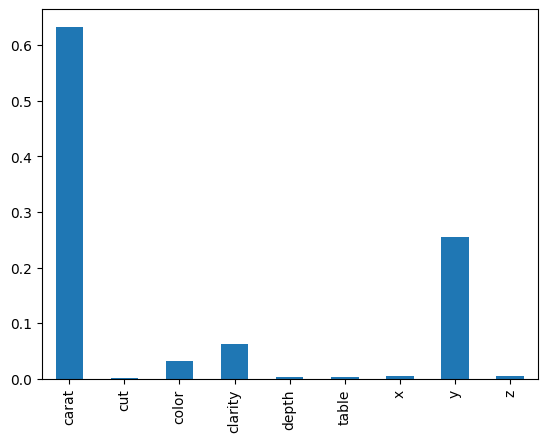

In [ ]:
from matplotlib import pyplot as plt
graph = pd.Series(rr.feature_importances_,xx.columns)
graph.plot.bar()
plt.show